# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)

In [3]:
#df = pd.read_csv("/content/gdrive/MyDrive/W24ML Code/Data/fraudTest.csv")
df = pd.read_csv("fraudTest.csv")

In [38]:
df_select.head()

,trans_date_trans_time,category,amt,city_pop,is_fraud,time_var
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,25
1,2020-06-21 12:14:33,personal_care,29.84,302,0,33
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,53
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0,15
4,2020-06-21 12:15:17,travel,3.19,1126,0,17


In [4]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
#y = pd.DataFrame(df_select["is_fraud"])

y = df_select["is_fraud"]

C:\Users\anshr\AppData\Local\Temp\ipykernel_13968\3601195566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
C:\Users\anshr\AppData\Local\Temp\ipykernel_13968\3601195566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [11]:
y

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
555714,0
555715,0
555716,0
555717,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [10]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [20]:
over_log.score(X_test, y_test)

0.9100146356678424

In [21]:
under_log.score(X_test, y_test)

0.9045082655533961

In [22]:
smote_log.score(X_test, y_test)

0.9116701456368915

In [ ]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [ ]:
# Sensitivity here in credit fraud is more important as seen from last class

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
y_true = y_test

In [15]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76051,  7007],
       [   76,   224]], dtype=int64)

In [16]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7466666666666667


In [17]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[72572, 10486],
       [   76,   224]], dtype=int64)

In [18]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7466666666666667


In [19]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75831,  7227],
       [   76,   224]], dtype=int64)

In [20]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7466666666666667


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [32]:
# Concatenate features and target variable along with column names
feature_names = X.columns.tolist()  
raw_temp_with_names = np.concatenate([X_train, y_train.to_numpy().reshape(-1, 1)], axis=1)

# Create a DataFrame with column names
raw_temp = pd.DataFrame(raw_temp_with_names, columns=feature_names + ['is_fraud'])




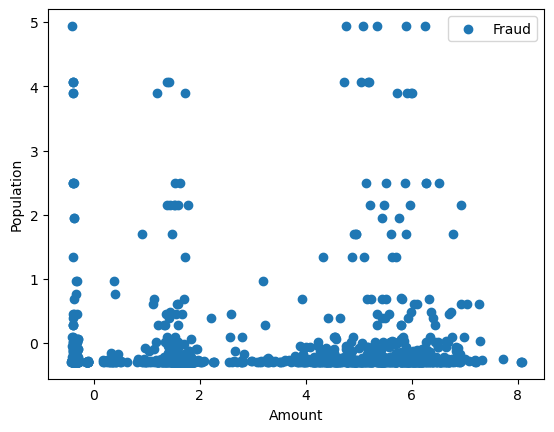

In [35]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

## - Make a dataframe that has a dual index and 9 Rows.
## - Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
## - Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
## - Choose what you think is the best model and why. Test on Holdout

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
import pandas as pd

In [37]:
resampling_methods = { "over": RandomOverSampler(), "under": RandomUnderSampler(), "smote": SMOTE()}

model_configs = {"LOG" : LogisticRegression(),
                "LASSO" : LogisticRegression(penalty="l1", C=2., solver="liblinear"),
                "DTREE" : DecisionTreeClassifier()}

In [38]:
trained_models = {}
results = []

In [45]:
def calc_perf_metric(y_true, y_pred) :
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return (sensitivity, specificity, precision, recall, f1)

In [46]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key = f"{resample_key}_{model_key}"
        
        m = model.fit(resample_X, resample_y)
        trained_models[combined_key] = m
        
        y_pred = m.predict(X_test)
        
        sensitivity, specificity, precision, recall, f1 = calc_perf_metric(y_test, y_pred)
        
        results.append({"Model" : combined_key,
                        "Sensitivity" : sensitivity,
                        "Specificity" : specificity,
                        "Precision" : precision,
                        "Recall" : recall,
                        "F1" : f1})

        
        

In [49]:
results_df = pd.DataFrame(results)
# Set the dual index
results_df.set_index(["Model"], inplace=True)

In [50]:
results_df

,Sensitivity,Specificity,Precision,Recall,F1
Model,,,,,
over_LOG,0.746667,0.917865,0.031791,0.746667,0.060986
over_LASSO,0.746667,0.917913,0.031809,0.746667,0.061019
over_DTREE,0.580000,0.998411,0.568627,0.580000,0.574257
under_LOG,0.743333,0.926569,0.035274,0.743333,0.067351
under_LASSO,0.746667,0.926485,0.035387,0.746667,0.067572
under_DTREE,0.953333,0.941932,0.055980,0.953333,0.105750
smote_LOG,0.746667,0.914108,0.030443,0.746667,0.058501
smote_LASSO,0.746667,0.914192,0.030472,0.746667,0.058554
smote_DTREE,0.713333,0.993173,0.274008,0.713333,0.395930


- Decision Tree (DT) performs better than Logistic Regression (LOG) and Logistic Regression with Lasso regularization (LASSO) in terms of sensitivity, specificity, precision, recall, and F1-score across all resampling methods.
- Among the resampling methods, SMOTE generally provides better performance compared to oversampling and undersampling. 
- There is not much difference in performance metrics between oversampling and undersampling methods for Logistic and LASSO regularization.

Based on the observed patterns, I would choose Decision Tree (DT) as the best model. It consistently outperforms Logistic Regression and Logistic Regression with Lasso regularization across all resampling methods. Additionally, it achieves higher sensitivity, specificity, precision, recall, and F1-score, indicating better overall performance in detecting fraudulent transactions.


- Considering it's credit card fraud data, the most appropriate choice would be to prioritize maximizing sensitivity while maintaining a reasonable level of specificity. This is because in credit card fraud detection, the focus is on identifying as many fraudulent transactions as possible (high sensitivity) while minimizing the risk of incorrectly flagging legitimate transactions as fraudulent (specificity).


- Given this priority, the "under_DTREE" model (Decision Tree trained on data with Random UnderSampling) seems more appropriate. It has a higher sensitivity (0.953) compared to "smote_DTREE" (0.713), which means it is better at detecting fraudulent transactions. Additionally, while "under_DTREE" has slightly lower specificity (0.942) compared to "smote_DTREE" (0.993), it still maintains a reasonable level of specificity, indicating a lower risk of false positives.

In [66]:
# Fit Decision Tree model using the entire training data
best_model = DecisionTreeClassifier()
best_model.fit(under_X, under_y)

# Predict on holdout set
y_holdout_pred = best_model.predict(X_holdout)


In [65]:
# Calculate performance metrics on holdout set
holdout_metrics = calc_perf_metric(y_holdout, y_holdout_pred)

print("Holdout Metrics (Sensitivity, Specificity, Precision, Recall, F1):\n", holdout_metrics)

Holdout Metrics (Sensitivity, Specificity, Precision, Recall, F1):
 (0.9572649572649573, 0.9444504680328165, 0.06791995148574893, 0.9572649572649573, 0.12684031710079272)


Test Set:

Sensitivity: 0.953,
Specificity: 0.942,
Precision: 0.056,
Recall: 0.953,
F1-score: 0.106

Holdout Set:

Sensitivity: 0.957,
Specificity: 0.944,
Precision: 0.068,
Recall: 0.957,
F1-score: 0.127

Comparing the two sets of metrics, we can see that the performance of the "under_DTREE" model is quite consistent between the test set and the holdout set. The model maintains high sensitivity and specificity on both sets, with slightly higher values observed on the holdout set. Additionally, the precision, recall, and F1-score also show similar trends between the two sets, with slightly higher values on the holdout set.

**Overall, the "under_DTREE" model demonstrates robust performance across both the test and holdout sets, indicating its reliability and effectiveness in identifying fraudulent transactions while minimizing false alarms.**